In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/data.csv"



In [ ]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATA CLEANING

In [ ]:
df.isna().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [ ]:
df.shape

(2017, 17)

In [ ]:
df.columns


Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


DATA ANALYSIS

In [ ]:
top_5_artists = df.groupby("artist").count().sort_values(by="song_title",ascending=False)["song_title"][:5]
print(top_5_artists)

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64


<Axes: ylabel='artist'>

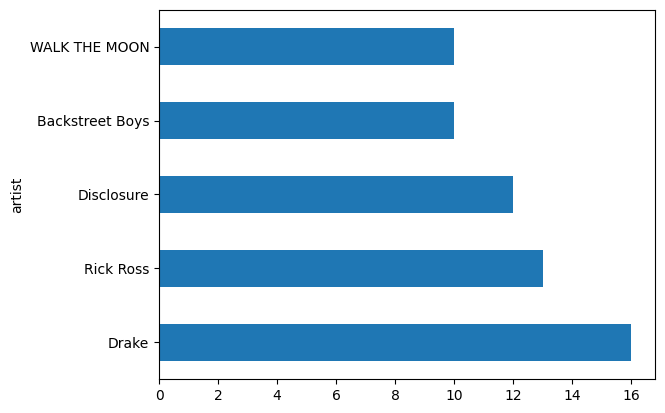

In [ ]:
top_5_artists.plot.barh()

In [ ]:
top_5_loudest_track = df[["loudness","song_title"]].sort_values(by="loudness",ascending=True)[:5]
top_5_loudest_track

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


Text(0.5, 1.0, 'top 5 loudest track')

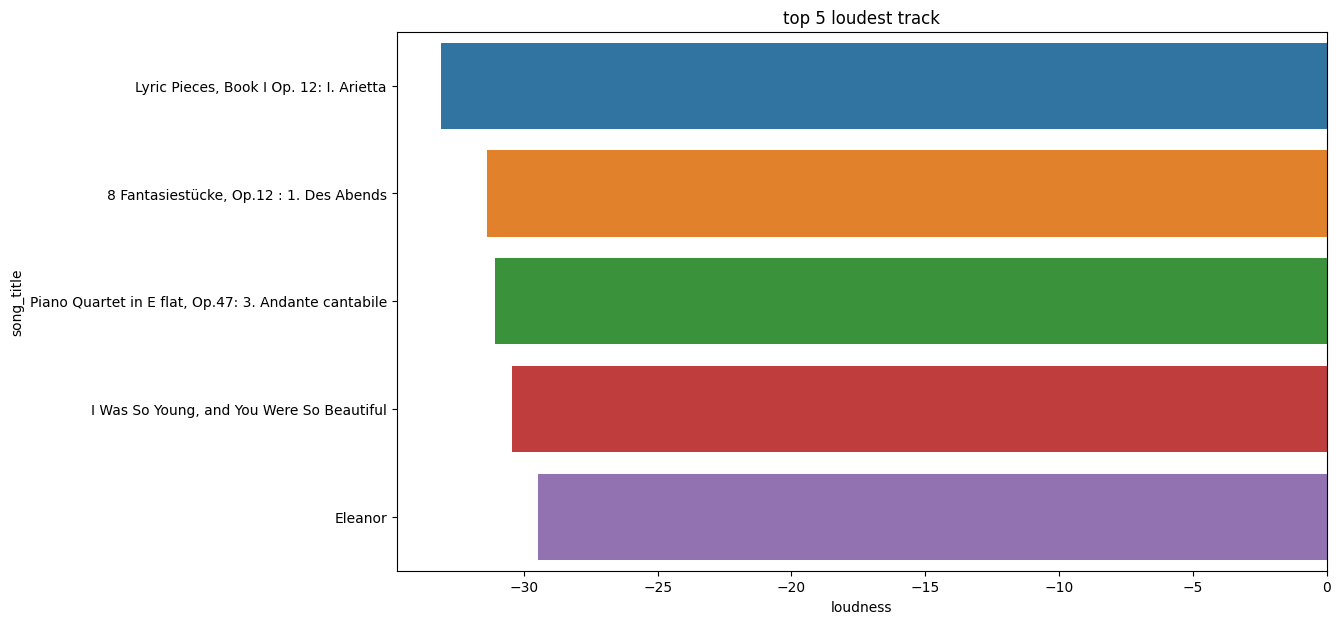

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x="loudness", y="song_title", data=top_5_loudest_track)
plt.title("top 5 loudest track")

In [ ]:
top_artists_danceable_songs = df[["danceability","song_title","artist"]].sort_values(by="danceability",ascending=False)[:5]
top_artists_danceable_songs

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


Text(0.5, 1.0, 'Danceability on TOP 5 songs')

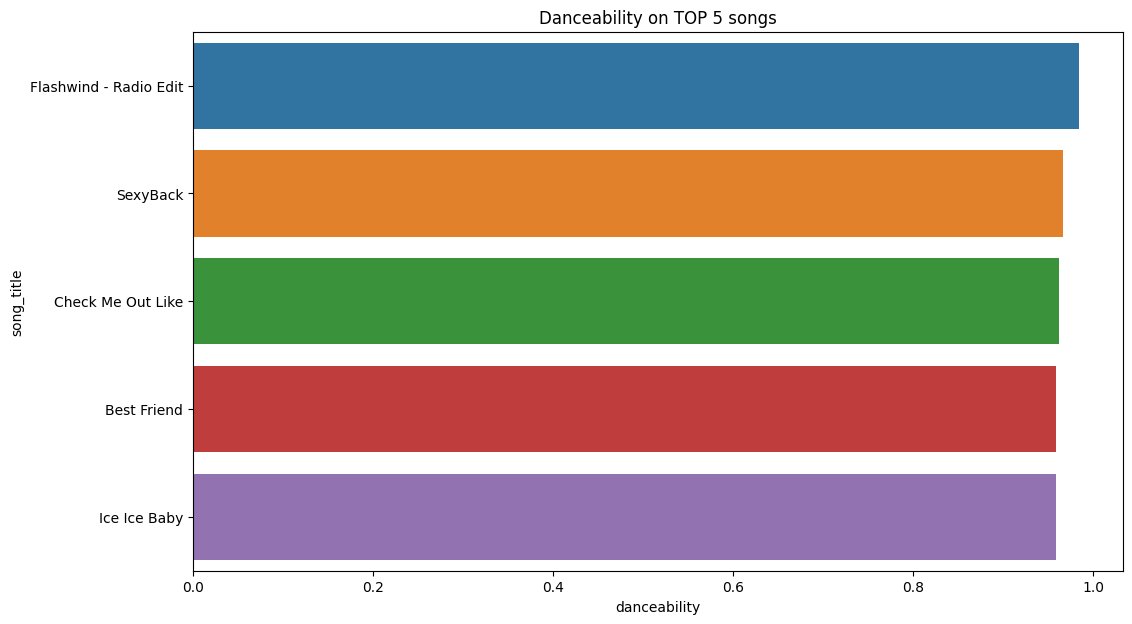

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x="danceability", y="song_title", data =top_artists_danceable_songs)
plt.title("Danceability on TOP 5 songs")

In [ ]:

Top_5_instrumental_tracks =  df[["instrumentalness","song_title","artist"]].sort_values(by="instrumentalness",ascending=False)[:5]
Top_5_instrumental_tracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


Text(0.5, 1.0, 'Danceability on TOP 5 songs')

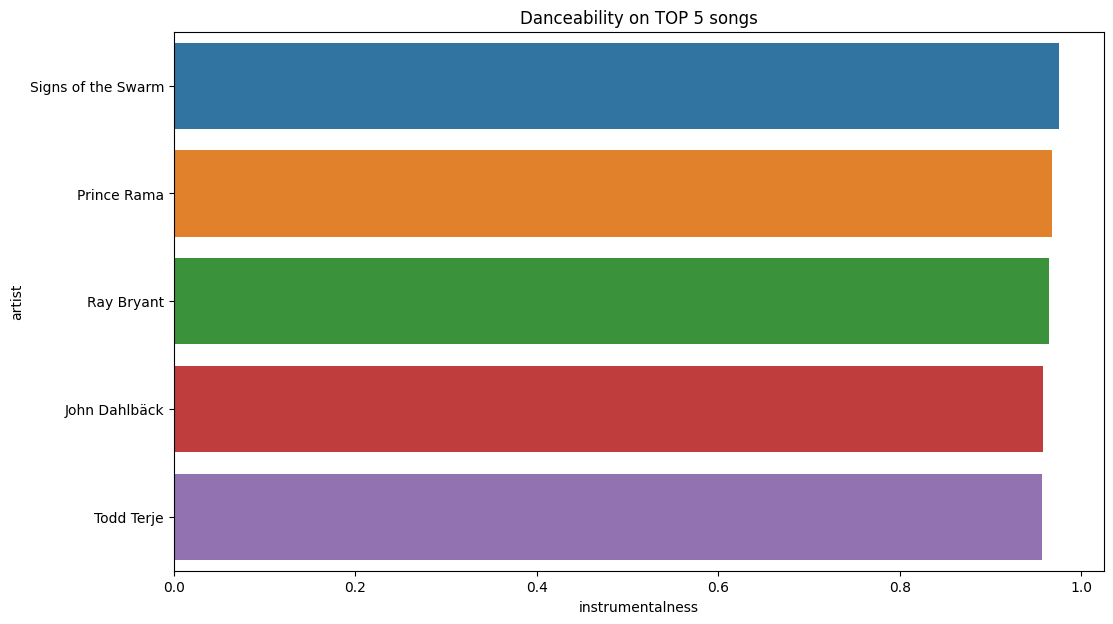

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x="instrumentalness", y="artist", data =Top_5_instrumental_tracks )
plt.title("Danceability on TOP 5 songs")

<ipython-input-23-3140b8e1cbb0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


<Axes: >

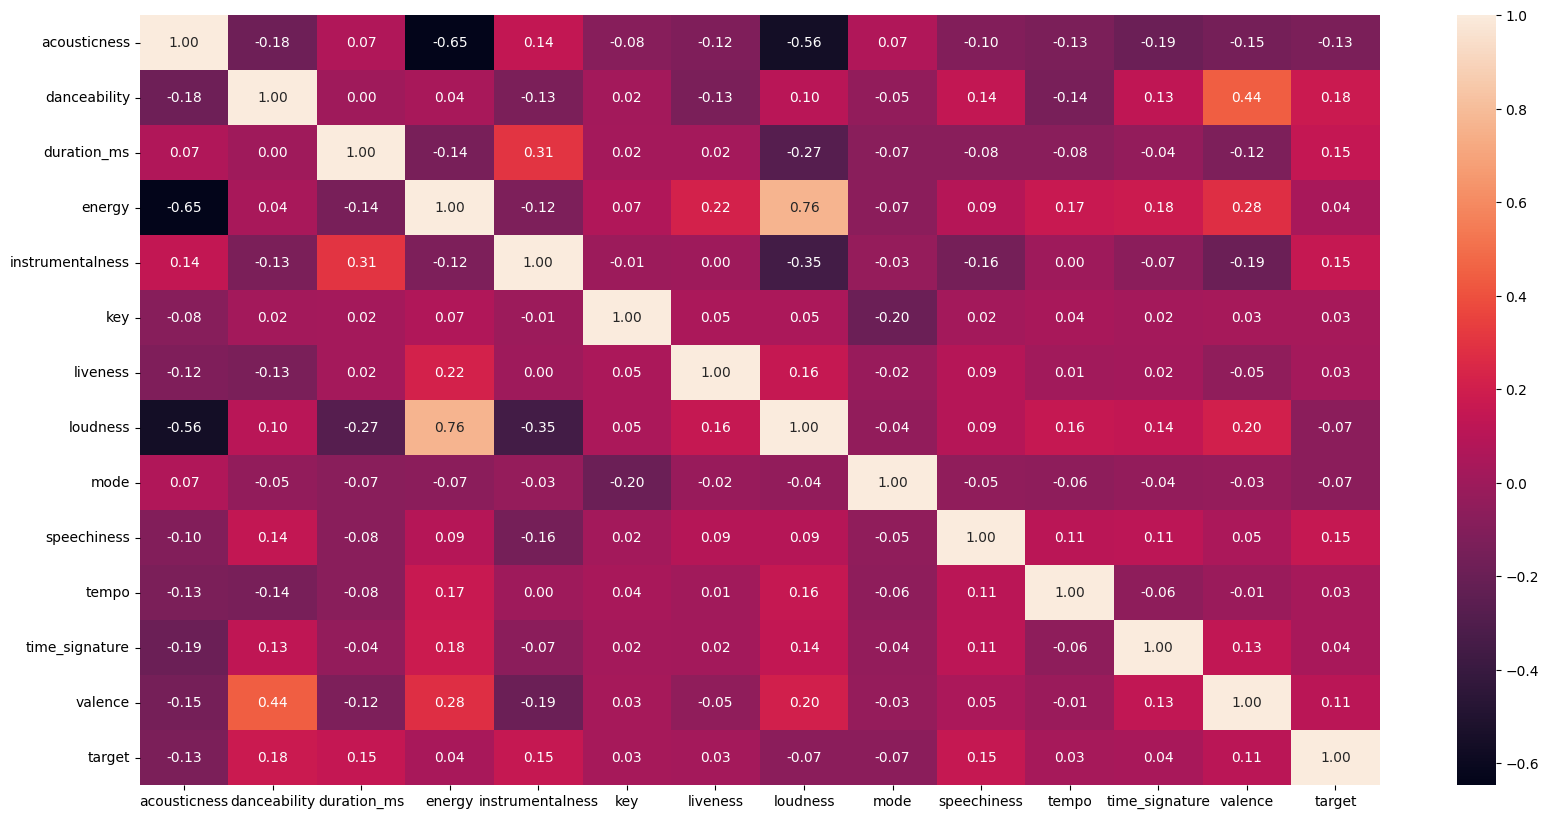

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Text(0.5, 1.0, 'Hisogram plot')

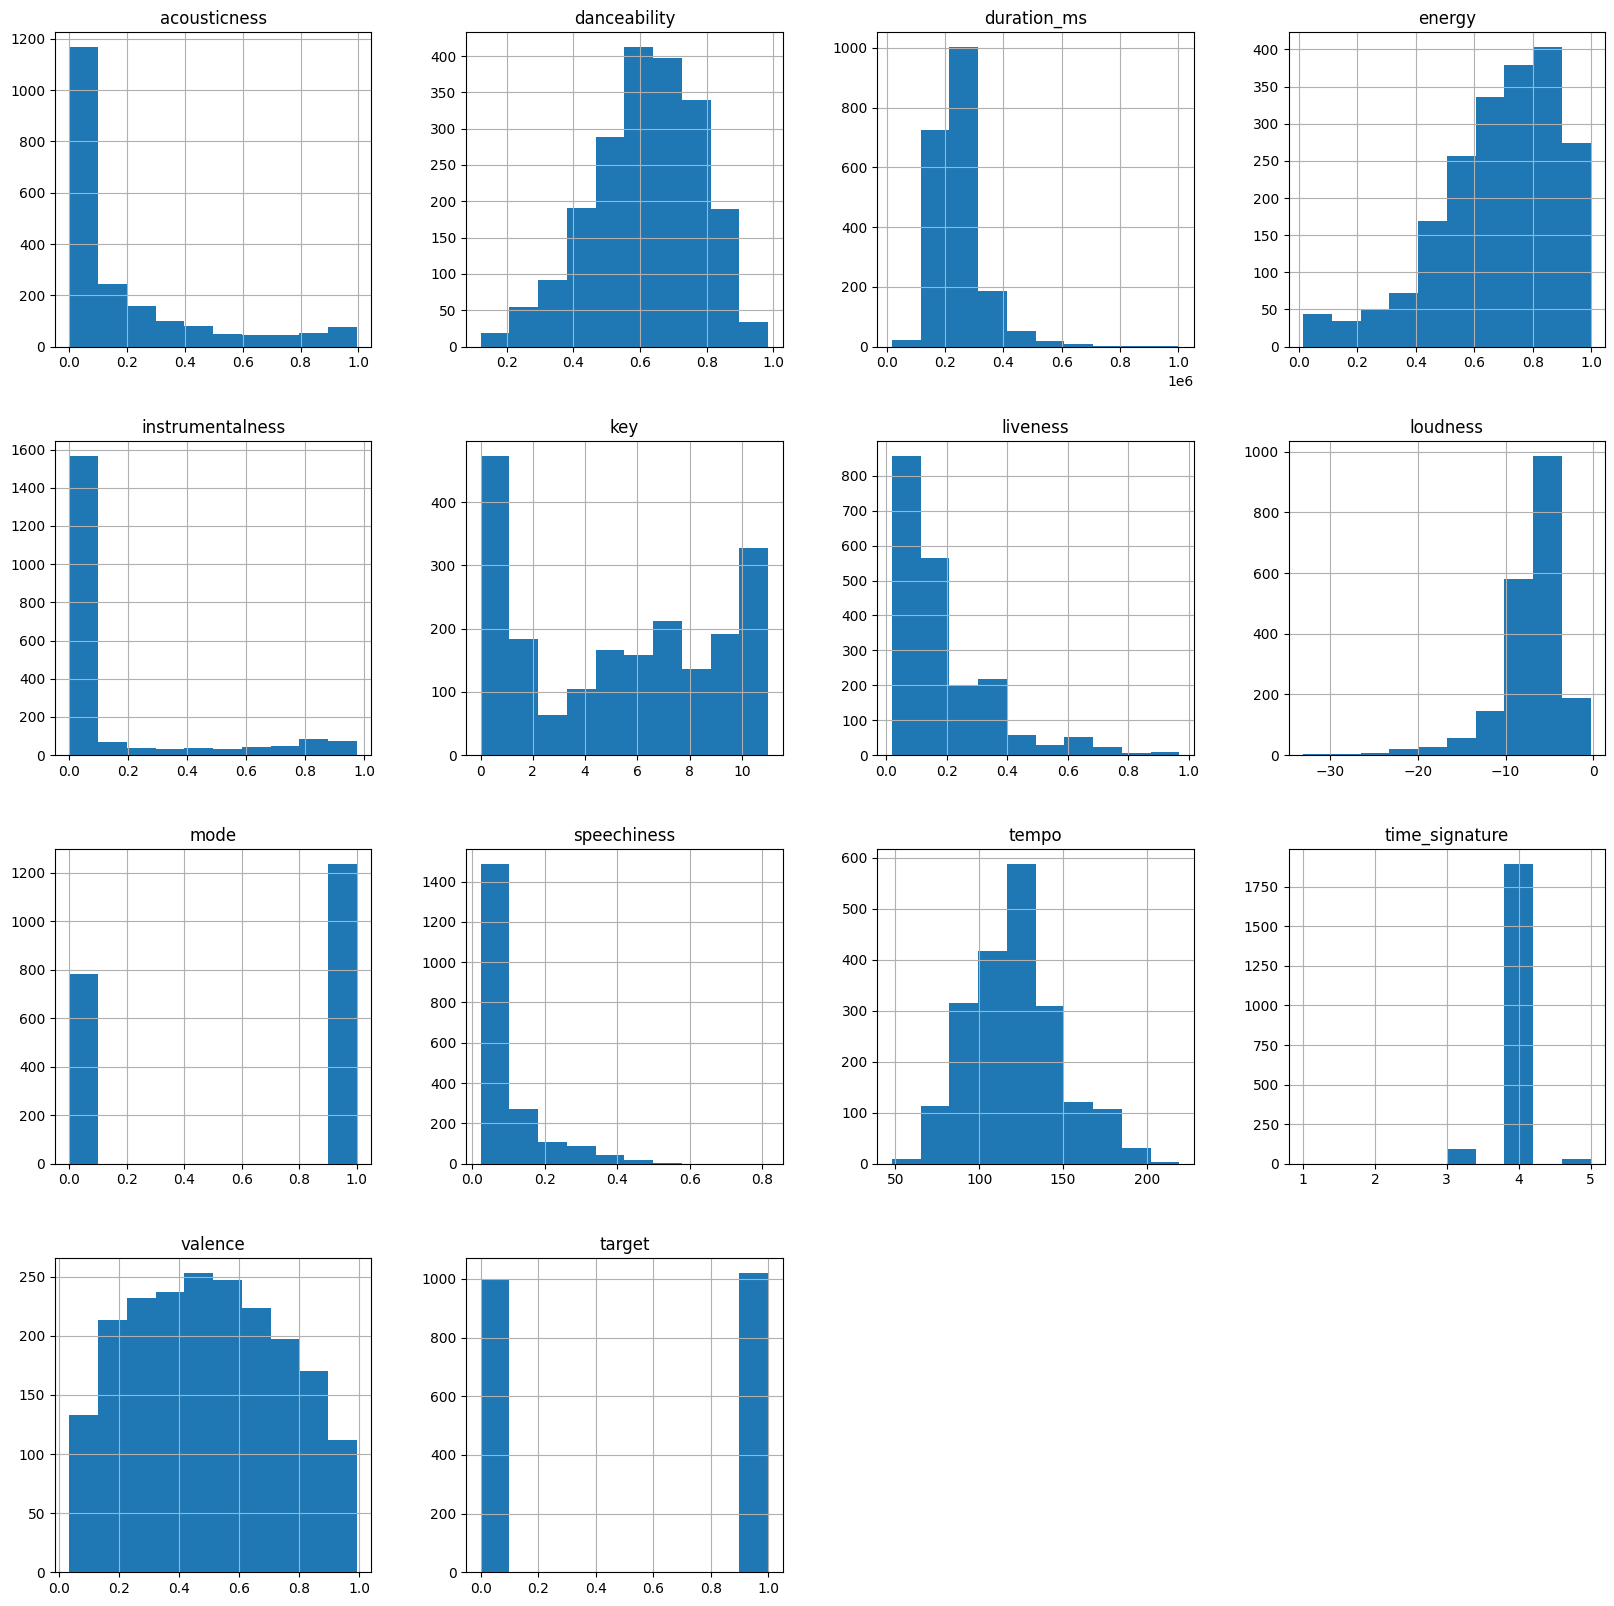

In [ ]:
df.hist(figsize=(20,20))
plt.title("Hisogram plot", size=15, weight='bold')

K-MEDOIDS ALGO

In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = df.reset_index()[['energy', 'instrumentalness']].values.tolist()
np.asarray(data)

array([[4.34e-01, 2.19e-02],
       [3.59e-01, 6.11e-03],
       [4.12e-01, 2.34e-04],
       ...,
       [9.35e-01, 3.99e-03],
       [9.92e-01, 6.77e-01],
       [9.15e-01, 3.87e-05]])

In [ ]:
kmedoids = KMedoids(n_clusters=2).fit(data)

In [ ]:
kmedoids.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
kmedoids.cluster_centers_

array([[0.544 , 0.0222],
       [0.825 , 0.0201]])

In [ ]:
lst_1=[]
lst_0=[]
for i in range(len(kmedoids.labels_)):
  if(kmedoids.labels_[i]==1):
    lst_1.append(data[i])
  else:
    lst_0.append(data[i])

print(lst_1)
print(lst_0)

[[0.944, 0.0], [0.855, 0.0143], [0.748, 0.00348], [0.832, 0.0563], [0.955, 0.0451], [0.759, 0.185], [0.719, 0.308], [0.74, 0.369], [0.925, 1.35e-06], [0.795, 0.269], [0.837, 0.0403], [0.687, 0.0], [0.823, 0.0], [0.705, 0.0], [0.852, 0.625], [0.792, 1.54e-06], [0.819, 0.0], [0.833, 0.0], [0.756, 0.711], [0.86, 0.00457], [0.957, 0.058], [0.846, 0.0624], [0.84, 0.112], [0.77, 0.0787], [0.786, 0.865], [0.945, 0.753], [0.7, 0.0], [0.715, 3.5e-06], [0.831, 0.0], [0.778, 0.666], [0.708, 2.08e-05], [0.853, 0.13], [0.948, 0.0], [0.918, 0.000215], [0.725, 1.54e-05], [0.705, 0.0], [0.824, 0.627], [0.733, 0.000219], [0.734, 0.263], [0.745, 0.000406], [0.873, 0.0365], [0.741, 0.0], [0.814, 0.0], [0.789, 0.0], [0.776, 0.0172], [0.98, 0.00661], [0.736, 5.74e-05], [0.793, 0.0], [0.773, 0.032], [0.769, 0.0], [0.813, 0.0293], [0.868, 7.34e-06], [0.71, 0.0], [0.907, 0.000131], [0.717, 0.0], [0.873, 0.0], [0.934, 0.0018], [0.912, 0.000103], [0.712, 0.0], [0.924, 0.0266], [0.804, 0.0599], [0.864, 0.0], [0.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs


print(__doc__)

# Generate sample data
centers = [[0.544 , 0.0222],[0.825 , 0.0201]]
X, labels_true = make_blobs(
    n_samples=75, centers=centers, cluster_std=0.4, random_state=0
)

# Compute Kmedoids clustering
cobj = KMedoids(n_clusters=3).fit(X)
labels = cobj.labels_

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'KMedoids clustering. Medoids are represented in cyan.')

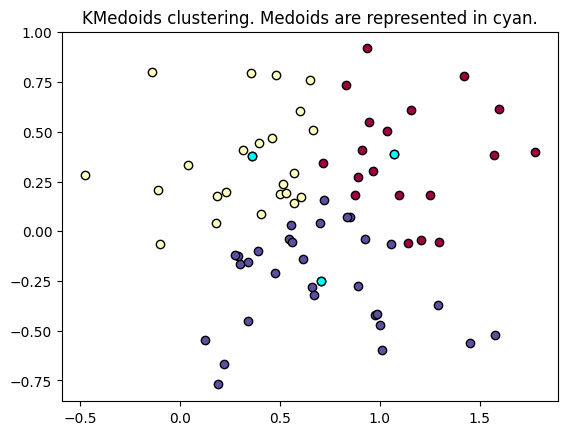

In [ ]:
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]
for k, col in zip(unique_labels, colors):

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.plot(
    cobj.cluster_centers_[:, 0],
    cobj.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
)

plt.title("KMedoids clustering. Medoids are represented in cyan.")

K-MEDOIDS

In [ ]:
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(path)
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
# Extract the features and scale them
X = data.drop(columns=['artist', 'song_title', 'key', 'mode', 'time_signature', 'duration_ms']).values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Cluster the data using k-medoids
kmedoids = KMedoids(n_clusters=5, metric='euclidean', init='k-medoids++')
kmedoids.fit(X)

# Add the cluster labels to the dataset
data['cluster'] = kmedoids.labels_

# Print the number of tracks in each cluster
print(data['cluster'].value_counts())


4    784
2    570
1    390
3    157
0    116
Name: cluster, dtype: int64


In [ ]:
data.head(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,cluster
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future,4
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino,4
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future,4
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House,3
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys,2


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

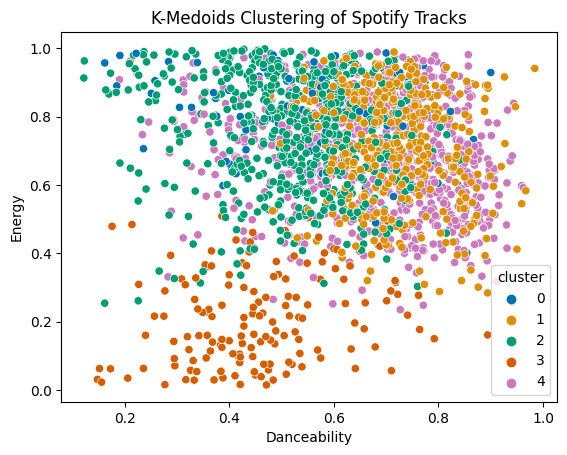

In [ ]:
# Plot the clusters
sns.scatterplot(data=data, x='danceability', y='energy', hue='cluster', palette='colorblind')
plt.title('K-Medoids Clustering of Spotify Tracks')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

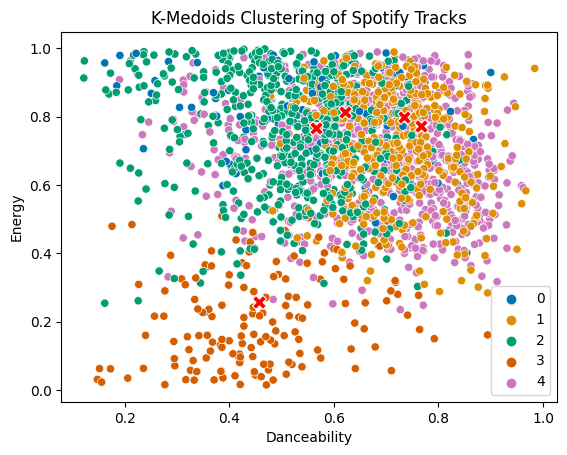

In [ ]:
# Plot the clusters and mark the medoids with different colors
sns.scatterplot(data=data, x='danceability', y='energy', hue='cluster', palette='colorblind')
medoids = kmedoids.medoid_indices_
sns.scatterplot(data=data.iloc[medoids], x='danceability', y='energy', color='red', marker='X', s=100)
plt.title('K-Medoids Clustering of Spotify Tracks')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()